<a id = "head"></a>
# <p style="text-align: center;">Исследование объявлений о продаже квартир</p>
---

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.


#### Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

#### План действий:

1. [Изучение общей информации о данных;](#step1)
2. [Предобработка данных;](#step2)
3. [Расчет дополнительных параметров и добавление их в таблицу;](#step3)
4. [Проведение исследовательского анализа данных;](step4)
5. [Общий вывод](#step5)

<a id = "step1"></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию

[Начало](#head)  [2](#step2)  [3](#step3)  [4](#step4) [5](#step5)

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
realty = pd.read_csv(r'C:\Users\vladi\Downloads\real_estate_data.csv', sep='\t')

In [10]:
realty

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [11]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
realty.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В большинстве столбцов обнаружены пропуски. Так как одна часть данных формировались пользователями, а вторая получена автоматически, можно предположить, что определенная информация не была указана при публикации объявления. Также при автоматической выгрузке мог произойти какой-то сбой, который привел к потере данных.
О дополнительных причинах и о природе появления пропусков можно будет сказать после более детального рассмотрения данных в таблице.

<a id = "step2"></a>
## Шаг 2. Предобработка данных

[Начало](#head)  [1](#step1)  [3](#step3)  [4](#step4) [5](#step5)

#### Столбец "Количество этажей в доме"

In [13]:
realty['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [15]:
realty[(realty['floors_total'].isnull())&(realty['floor'] > 9)].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.4,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.0,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.4,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.0,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,NaN,19.0,12,NaN,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,NaN,NaN,32.0,12,NaN,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,NaN,NaN,NaN,18,NaN,...,NaN,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,NaN,NaN,11.0,12,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5784,4,4262941.0,59.90,2017-04-02T00:00:00,2,NaN,NaN,31.7,18,NaN,...,11.90,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0


В этом стобце было найдено 86 пропусков. Скорее всего эти данные не были указаны пользователями, размещавшими свои объявления. Их также необходимо заполнить, потому что этот параметр понадобится для дальнейшей работы в рамках исследования. 
В этот раз медианным значением заполнить все пропуски не получится, так как во многих объявлениях, где не указан этот показатель, квартиры располагаются выше 9-го этажа. 

In [17]:
# Функция для замены значений: 
def count_floors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floors_total == 0 and floor <= 9:
        return 9
    elif floors_total == 0 and floor > 9:
        return floor
    else:
        return floors_total

In [18]:
realty['floors_total'] = realty['floors_total'].fillna(0)

In [19]:
realty['floors_total'].isna().sum()

0

In [20]:
realty['floors_total'] = realty.apply(count_floors, axis =1)

In [21]:
realty['floors_total'].describe()

count    23699.000000
mean        10.678678
std          6.591239
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Я решил поступить следующим образом. Если квартира находится ниже 9-го этажа, то пропущенное количество этажей в таком доме меняю на медиану (то есть на 9). Если же квартира располагается выше 9-го этажа, то буду считать, что она на последнем этаже.

<font color=green>Логичный ход. Можно также просто заполнить модой (самым популярным значением) по городам.

In [22]:
realty['floors_total'] = pd.to_numeric(realty['floors_total'], downcast ='signed')

In [23]:
realty['floors_total'].sample(5)

12626     5
5502      5
2360     19
8429      9
7772      9
Name: floors_total, dtype: int8

Исходя из общей информации о таблице видно, что столбец с количеством этажей имеет вещественный тип данных, что неверно. Поэтому была произведена замена на целочисленный тип данных.

#### Столбец "Высота потолков"

In [24]:
realty['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [25]:
realty[realty['ceiling_height'] > 4]['ceiling_height'].count()

75

In [26]:
realty['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В этом стобце было найдено 9195 пропусков. Считаю, что необходимо заполнить пропуски в этом столбце, так как  этот параметр может влиять на цену кватиры. 
  
В столбце присутсвуют аномальные значения. Высота квартир в России редко превышает 3.5 - 4 метра. В наших данных встречается 75 объектов с высотой более 4 метров. Поэтому для замены пустых значений буду использовать медианное значение высоты в зависимости от количества этажей в доме, чтобы увеличить точность заполнения. 

In [27]:
ceiling_height_median = realty.groupby('floors_total')['ceiling_height'].median().fillna(2.65)

In [28]:
realty['ceiling_height'] = realty['ceiling_height'].fillna(0)

In [29]:
def ceiling_height(row):
    height = row['ceiling_height']
    floors = row['floors_total']
    
    if height == 0:
        return ceiling_height_median[floors]    
    return height    

In [30]:
realty['ceiling_height'] = realty.apply(ceiling_height, axis =1)

In [31]:
realty['ceiling_height'].describe()

count    23699.000000
mean         2.735521
std          0.994298
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [32]:
realty['ceiling_height'].isna().sum()

0

Вероятно, в этом столбце было много пропусков в связи с тем, что пользователи не указали этот параметр при размещении объявления. Обнаруженные аномалии могли возникнуть из-за ошибки выгрузки данных.

#### Столбец "Жилая площадь в квадратных метрах(м²)"

В столбце "жилая площадь" найдено 1903 пропуска. Возможно эти данные по какой-то причине не были выгружены или попросту отсутствовали в объявлении. В дальнейшем они понадобятся для нашего исследования, поэтому необходимо заполнить все пропуски. 

Для начала я попробовал заменить пропуски медианным значением жилой площади в зависимости от числа комнат в квартире. В результате по некоторым объявлениям получилось, что общая площадь была меньше, чем жилая.

Предварительно проверю, нет ли в таблице строк, в которых жилая площадь превышает общую.

In [33]:
realty[realty['total_area'] < realty['living_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких значений не оказалось. Можно приступить к заполнению пропусков

In [34]:
realty['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [35]:
total_area_med = realty.groupby('rooms')['total_area'].median()
#total_area_med

In [36]:
living_area_med = realty.groupby('rooms')['living_area'].median()
#living_area_med

In [37]:
living_area_part = living_area_med / total_area_med
living_area_part

rooms
0     0.690979
1     0.481400
2     0.575472
3     0.616438
4     0.640483
5     0.626733
6     0.672273
7     0.677570
8     0.683072
9     0.595448
10    0.592076
11    0.708841
12    0.455222
14    0.641519
15    0.693220
16    0.666667
19    0.706086
dtype: float64

In [38]:
def living_area(row):
    rooms = row['rooms']
    living_area = row['living_area']
    total_area = row['total_area']
        
    if living_area == -1: 
        return total_area * living_area_part[rooms]
    
    return living_area

Эта функция заполняет пустые значения жилой площади произведением общей площади и медианной доли жилой площади в зависимости от числа комнат в квартире.    

Чтобы функция работала, предварительно заполню пропуски произвольным значением (в данном случае это -1)

In [39]:
realty['living_area'] = realty['living_area'].fillna(-1)

In [40]:
realty['living_area'] = realty.apply(living_area, axis =1)

In [41]:
realty['living_area'].describe()

count    23699.000000
mean        34.637431
std         22.748419
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        427.546729
Name: living_area, dtype: float64

#### Столбец "Площадь кухни"

В столбце "Площадь кухни" изначально было найдено 2278 пропусков. Так как это один из параметров, которые заполняют пользователи при размещении объявления, можно предположить, что данные значения не были указаны изначально. 

In [42]:
def kitchen_area(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    
    if kitchen_area == -1:
        return total_area - living_area
    
    return kitchen_area

Эта функция будет менять временное значение на разницу общей и жилой площадей

In [43]:
realty['kitchen_area'] = realty['kitchen_area'].fillna(-1)

In [44]:
realty['kitchen_area'] = realty.apply(kitchen_area, axis =1)

In [45]:
realty['kitchen_area'].describe()

count    23699.000000
mean        11.787055
std          8.375264
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        256.240044
Name: kitchen_area, dtype: float64

Теперь проверим, остались ли в таблице противоречивые строки:

In [46]:
realty[realty['total_area'] < (realty['living_area'] + realty['kitchen_area'])].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21956,0,5200000.0,46.0,2018-07-20T00:00:00,2,2.55,5,44.0,5,NaN,...,8.0,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0
11472,13,5600000.0,48.0,2017-05-09T00:00:00,2,2.80,13,34.5,3,False,...,18.0,2.0,Санкт-Петербург,46358.0,15966.0,0.0,NaN,0.0,NaN,93.0
1992,5,4000000.0,37.4,2018-02-11T00:00:00,1,2.53,16,36.4,10,NaN,...,8.6,1.0,Санкт-Петербург,19979.0,21690.0,0.0,NaN,1.0,1052.0,74.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9,26.1,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
9333,11,2370000.0,41.9,2018-02-15T00:00:00,1,2.75,12,33.3,11,NaN,...,14.1,NaN,Колпино,28171.0,33958.0,0.0,NaN,0.0,NaN,3.0


In [47]:
len(realty[realty['total_area'] < (realty['living_area'] + realty['kitchen_area'])])

73

Было найдено 73 квартиры, в которых жилая и нежилая площади в совокупности превышают общую площадь. Думаю, что можно пожертвовать этими данными, их не так много. На результаты исследования это повлиять не должно.

In [48]:
realty = realty[realty['total_area'] >= 
                (realty['living_area'] + realty['kitchen_area'])].reset_index(drop = True)

#### Столбец "is_apartment" 

В данном столбце пропущено большинство значений. Скорее всего данный пункт не был заполнен пользователями при подаче объявления. Раз эта графа осталась пустой, будем считать, что это не апартаменты.

In [49]:
realty['is_apartment'] = realty['is_apartment'].fillna(False)

In [50]:
realty['is_apartment'].dtypes

dtype('bool')

Изменив пропущенные значения в этом столбце на False у нас автоматически поменялся тип данных на логический.

#### Столбец "Балкон"

В столбце "балкон" найдено 11519 пропусков. Как было написано в описании проекта, если человек не указал число балконов, скорее всего, их нет. Меняем эти пропуски на 0.

In [51]:
realty['balcony'] = realty['balcony'].fillna(0)

In [52]:
#realty['balcony'].isnull().sum()

In [53]:
realty['balcony'] = pd.to_numeric(realty['balcony'], downcast ='integer')

Заменил тип данных в этом столбце на целочисленный, потому что число балконов не может быть дробным числом.

#### Столбец "название населённого пункта"

В этом столбце всего 49 прорусков. Заменим эти значения на "Не указано".

In [54]:
realty['locality_name'] = realty['locality_name'].fillna('не указано')

In [55]:
realty['locality_name'].isnull().sum()

0

#### Столбец "Расстояние до центра города (м)"

Данные из этого столбца помогут ответить на вопросы этого проекта, поэтому необходимо их заполнить. 

In [56]:
realty['cityCenters_nearest'].isna().sum()

5496

In [57]:
realty['cityCenters_nearest'].describe()

count    18130.000000
mean     14193.495312
std       8612.342551
min        181.000000
25%       9238.000000
50%      13094.500000
75%      16293.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [58]:
len(realty['locality_name'].unique())

365

In [59]:
realty.groupby('locality_name')['cityCenters_nearest'].median().sort_values(ascending = False).head(35)

locality_name
посёлок Молодёжное         65764.0
Зеленогорск                53381.0
Ломоносов                  51677.0
Кронштадт                  49575.0
посёлок Репино             42896.5
посёлок Белоостров         38868.0
посёлок Сапёрный           35859.5
Сестрорецк                 34821.0
посёлок Щеглово            34085.0
Петергоф                   33771.0
Павловск                   32683.0
посёлок Понтонный          32354.0
Колпино                    32018.0
Красное Село               29140.5
поселок Лисий Нос          28246.0
посёлок Усть-Ижора         28222.5
Пушкин                     27930.5
посёлок Металлострой       27602.0
посёлок Александровская    27468.0
посёлок Лисий Нос          27297.0
посёлок Петро-Славянка     27165.0
посёлок Песочный           26099.5
посёлок Левашово           25727.0
посёлок Шушары             24213.0
посёлок Стрельна           23506.0
поселок Мурино             21888.0
посёлок Парголово          19318.0
Санкт-Петербург            12243.0
не ука

В нашей таблице представлены объявления из 365 населенных пунктов Ленинградской области. Рассчитав медианное расстояние до центра города для каждого населенного пункта, я сделал вывод, что этот показатель актуален только для Санкт-Петербурга и для его муниципальных образований. Вероятно, что остальные населеные пункты, для которых медиана осталась пустым значением, разбросаны по всей Ленинградской области и в тех местах расстояние до центра не имеет большой разницы.

In [60]:
center_nearest_med = realty.groupby('locality_name')['cityCenters_nearest'].median()

Я создал переменную с медианными значениями расстояния до центра. Данные из этой перееменной помогут заполнить пропуски для объявлений, находящихся в Санкт-Петербурге и его районах. 

После заполнения пропусков значения для остальных населенных пунктов Ленинградской области останутся пустыми. В рамках исседования мы их рассматривать не будем. 

In [61]:
realty['cityCenters_nearest'] = realty['cityCenters_nearest'].fillna(-1)

In [62]:
def distance(row):
    citycenter = row['cityCenters_nearest']
    location = row['locality_name']
    
    
    if citycenter == -1:
        return center_nearest_med[location]
            
    
    return citycenter

In [63]:
realty['cityCenters_nearest'] = realty.apply(distance, axis =1)

In [64]:
realty.groupby('locality_name')['cityCenters_nearest'].median().sort_values(ascending = False).head(35)

locality_name
посёлок Молодёжное         65764.0
Зеленогорск                53381.0
Ломоносов                  51677.0
Кронштадт                  49575.0
посёлок Репино             42896.5
посёлок Белоостров         38868.0
посёлок Сапёрный           35859.5
Сестрорецк                 34821.0
посёлок Щеглово            34085.0
Петергоф                   33771.0
Павловск                   32683.0
посёлок Понтонный          32354.0
Колпино                    32018.0
Красное Село               29140.5
поселок Лисий Нос          28246.0
посёлок Усть-Ижора         28222.5
Пушкин                     27930.5
посёлок Металлострой       27602.0
посёлок Александровская    27468.0
посёлок Лисий Нос          27297.0
посёлок Петро-Славянка     27165.0
посёлок Песочный           26099.5
посёлок Левашово           25727.0
посёлок Шушары             24213.0
посёлок Стрельна           23506.0
поселок Мурино             21888.0
посёлок Парголово          19318.0
Санкт-Петербург            12243.0
не ука

In [65]:
realty['cityCenters_nearest'].isna().sum()

5364

#### Столбцы "Расстояние до ближайшего аэропорта в метрах (м)", "Расстояние до ближайшего парка (м)", "Расстояние до ближайшего водоёма (м), "Число водоёмов в радиусе 3 км", "Число парков в радиусе 3 км".

В рамках данного исследования эта информация не представляет большого интереса, поэтому заполнять пропуски здесь не будем.

Мне кажется, что здесь, как и в предыдущем случае, информация в этих столбцах актуальна только для Санкт-Петербурга. Остальные населенные пункты не настолько крупные, чтобы подобная информация сильно влияла на что-либо.


#### Столбец "Сколько дней было размещено объявление (от публикации до снятия)"

Здесь обнаружен 3181 пропуск. Заполнять их не будем, так как возможно эти объявления ещё не закрыты.

In [66]:
realty['days_exposition'].describe()

count    20455.000000
mean       180.988658
std        219.819351
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Приведение данных к нужным типам

Чтобы увеличить точность будущих вычислений необходимо перевести столбцы с ценой из вещественного типа данных в целочисленный.  

In [67]:
 realty['last_price'] = realty['last_price'].astype('int')

В столбце с датами публикации объявлений значения хранятся в виде текста. Необходимо привести этот столбец к формату даты.

In [68]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%d')

In [69]:
realty['first_day_exposition'].dtypes

dtype('<M8[ns]')

##### Итак, предварительная обработка данных окончена. В таблице по возможности были заполнены пропуски, а также  изменены типы данных, где это требовалось. 


<a id = "step3"></a>
## Шаг 3. Расчёт дополнительных параметров

[Начало](#head)  [1](#step1)  [2](#step2)  [4](#step4) [5](#step5)

#### 1. Расчет цены квадратного метра:

In [70]:
realty['price_per_meter'] = round(realty['last_price'] / realty['total_area'],2)

#### 2. Добавление столбцов дня недели, месяца и года публикации объявления:

In [71]:
realty['day_exposition'] = realty['first_day_exposition'].dt.weekday

In [72]:
realty['month_exposition'] = realty['first_day_exposition'].dt.month

In [73]:
realty['year_exposition'] = realty['first_day_exposition'].dt.year

#### 3. Классификация квартир в зависимости от этажа:

In [74]:
def floor_class(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

In [75]:
realty['floor_class'] = realty.apply(floor_class, axis =1)

In [76]:
realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,floor_class
12148,7,7140000,56.70,2018-07-19,2,2.70,25,33.70,7,False,...,2.0,468.0,0.0,NaN,63.0,125925.93,3,7,2018,другой
22653,4,4800000,66.30,2017-04-29,2,3.00,3,38.00,2,False,...,NaN,NaN,NaN,NaN,269.0,72398.19,5,4,2017,другой
13442,7,14500000,73.45,2017-02-10,2,3.20,9,43.89,3,False,...,2.0,630.0,0.0,NaN,382.0,197413.21,4,2,2017,другой
14023,23,16500000,144.00,2017-11-10,5,2.70,17,91.00,8,False,...,1.0,226.0,0.0,NaN,7.0,114583.33,4,11,2017,другой
20385,18,4790000,54.50,2019-02-26,2,2.50,4,33.30,4,False,...,2.0,596.0,1.0,1001.0,3.0,87889.91,1,2,2019,последний
17708,6,6150000,73.00,2016-03-05,4,2.55,9,49.00,9,False,...,0.0,NaN,0.0,NaN,244.0,84246.58,5,3,2016,последний
2066,17,4500000,45.00,2019-04-02,1,2.80,5,22.10,4,False,...,NaN,NaN,NaN,NaN,NaN,100000.00,1,4,2019,другой
6016,5,3480000,52.70,2018-03-26,2,2.70,4,28.80,1,False,...,NaN,NaN,NaN,NaN,52.0,66034.16,0,3,2018,первый
375,18,8400000,84.00,2018-06-26,2,2.75,3,41.00,1,False,...,0.0,NaN,0.0,NaN,201.0,100000.00,1,6,2018,первый
11741,0,5800000,61.30,2018-09-09,3,2.50,14,40.00,12,False,...,3.0,237.0,1.0,294.0,60.0,94616.64,6,9,2018,другой


#### 4. Расчет соотношения жилой площади и площади кухни к общей площади квартиры:

In [77]:
realty['living_area_share'] = round(realty['living_area'] / realty['total_area'], 2)

In [78]:
realty['kitchen_area_share'] = round(realty['kitchen_area'] / realty['total_area'], 2)

In [79]:
realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,floor_class,living_area_share,kitchen_area_share
18824,19,11990000,146.00,2019-02-27,4,3.00,6,77.60000,5,False,...,1.0,479.0,NaN,82123.29,2,2,2019,другой,0.53,0.19
13488,12,7000000,64.00,2018-11-11,2,2.70,9,29.50000,8,False,...,0.0,NaN,5.0,109375.00,6,11,2018,другой,0.46,0.19
3477,13,11900000,72.00,2018-02-20,2,3.00,25,36.00000,9,False,...,0.0,NaN,119.0,165277.78,1,2,2018,другой,0.50,0.19
14260,4,3595000,55.09,2015-09-15,1,2.70,18,26.52035,1,False,...,NaN,NaN,1047.0,65256.85,1,9,2015,первый,0.48,0.34
20618,13,5000000,53.50,2018-03-25,2,2.50,9,21.50000,1,False,...,0.0,NaN,NaN,93457.94,6,3,2018,первый,0.40,0.14
18919,20,24900000,129.00,2017-12-20,3,3.00,9,75.00000,5,False,...,3.0,457.0,398.0,193023.26,2,12,2017,другой,0.58,0.12
616,12,15800000,130.00,2019-04-04,5,2.55,5,83.00000,2,False,...,1.0,225.0,NaN,121538.46,3,4,2019,другой,0.64,0.11
6224,10,2500000,53.80,2018-02-20,2,3.00,4,29.90000,2,False,...,NaN,NaN,371.0,46468.40,1,2,2018,другой,0.56,0.16
20582,9,3300000,58.00,2017-10-13,2,2.60,10,30.00000,1,False,...,NaN,NaN,38.0,56896.55,4,10,2017,первый,0.52,0.14
17547,13,6870000,61.40,2016-01-14,2,2.75,23,35.80000,11,False,...,0.0,NaN,162.0,111889.25,3,1,2016,другой,0.58,0.16


<a id = "step4"></a>
## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

[Начало](#head)  [1](#step1)  [2](#step2)  [3](#step3) [5](#step5)

#### Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм.

In [80]:
column_names = ['total_area', 'price_per_meter', 'rooms', 'ceiling_height']

total_area
         total_area
count  23626.000000
mean      60.378810
std       35.688433
min       12.000000
25%       40.000000
50%       52.000000
75%       69.900000
max      900.000000


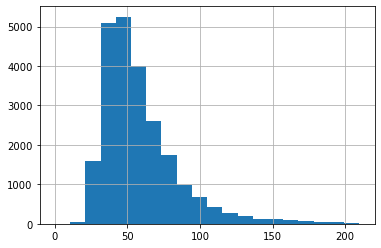

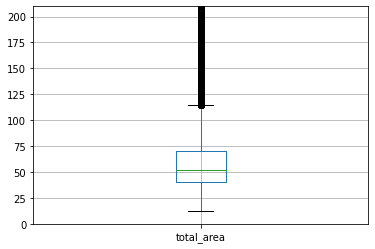

price_per_meter
       price_per_meter
count     2.362600e+04
mean      9.936917e+04
std       5.019599e+04
min       1.118300e+02
25%       7.657856e+04
50%       9.500000e+04
75%       1.142044e+05
max       1.907500e+06


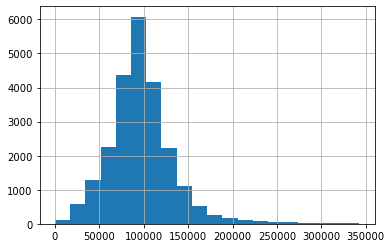

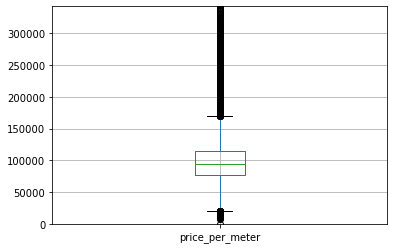

rooms
              rooms
count  23626.000000
mean       2.071701
std        1.079144
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       19.000000


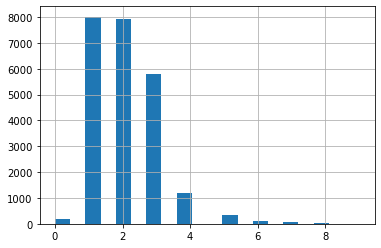

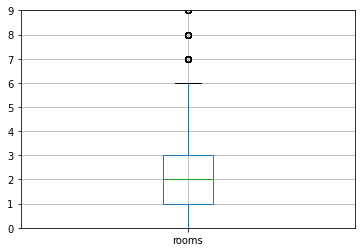

ceiling_height
       ceiling_height
count    23626.000000
mean         2.733399
std          0.969834
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000


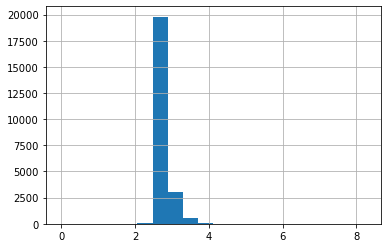

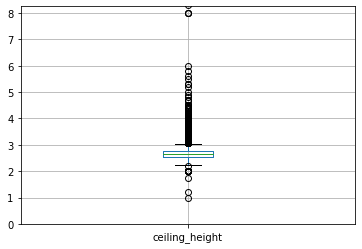

In [81]:
for column_name in column_names:
    print(column_name)
    print(realty[[column_name]].describe())
    q1 = np.percentile(realty[column_name], 25)
    q3 = np.percentile(realty[column_name], 75)
    realty[column_name].hist(bins = 20, 
                             range = (0, q3*3))
    plt.show()
    realty.boxplot(column = column_name)
    plt.ylim(0, q3*3)
    plt.show()

Глядя на построенные гистограммы, можно сказать, что данные распределены нормально. Все графики имеют один ярко выраженный пик. Основная масса наблюдений сосредоточена вокруг среднего значения.

Из диаграмм распределения следует, что во всех рассматриваемых параметрах есть аномальные значения. 

<font color='green'>Гистограммы построены, по ним сделаны подробные выводы. Молодец, что автоматизируешь построение графиков.

#### Изучение данных о времени продажи квартиры

In [82]:
realty['days_exposition'].describe()

count    20455.000000
mean       180.988658
std        219.819351
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [83]:
exposition_pivot = realty.pivot_table(index='locality_name', 
                                      values='days_exposition', 
                                      aggfunc=['count','mean','median'])
exposition_pivot.columns = ['count_exposition', 'mean_exposition','median_exposition']
exposition_pivot.sort_values(by = 'count_exposition', ascending = False).head(10)

,count_exposition,mean_exposition,median_exposition
Санкт-Петербург,13600,182.857574,95.0
посёлок Мурино,514,147.173152,72.5
посёлок Шушары,407,156.085995,92.0
Всеволожск,336,198.226190,124.5
Пушкин,307,209.579805,130.0
Колпино,307,144.058632,74.0
посёлок Парголово,301,152.897010,77.0
деревня Кудрово,299,180.872910,80.0
Гатчина,264,191.515152,100.5
Выборг,207,178.024155,101.0


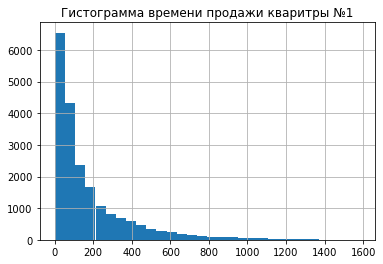

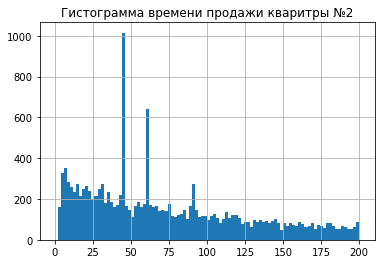

In [84]:
realty['days_exposition'].hist(bins = 30)
plt.title('Гистограмма времени продажи кваритры №1')
plt.show()
realty['days_exposition'].hist(bins = 100, range = (0,200))
plt.title('Гистограмма времени продажи кваритры №2')
plt.show()

In [85]:
realty['days_exposition'].mean()

180.98865802982155

In [86]:
realty['days_exposition'].median()

95.0

При сокращении диапазона гистограммы видим, что на графике образуется четыре пика: около 7 дней, в районе 40 дней, 60 дней и последний приблизительно 87 дней. Среднее время продажи кваритры составляет приблизительно 181 день - это значение завышено из-за аномально высоких значений. На основе полученных гистограмм и медианы заключаем, что в половине случаев квартира продается в течение 3 месяцев с момента размещения объявления. 

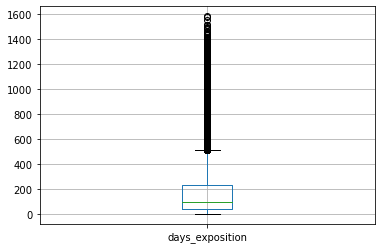

In [87]:
realty.boxplot(column = 'days_exposition')
plt.show()

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Максимальный срок продажи квартиры, который содержится в наших данных, превышает 4 года, минимальный - всего 1 день. Для начала рассморим объявления о продаже, которые были опубликованы менее 14 дней. 

(Небольшой комментарий: Я просмотрел несколько профильных источников на тему "За какой срок можно продать квартиру?". Все конечно зависит от множества факторов, но тем не менее большинство риэлторов называют срок в месяц вполне приемлемым. Отсюда я решил, что верхней границей быстрых продаж сделаю 2 недели)


In [88]:
realty['fast_sale'] = realty['days_exposition'] < 14

In [89]:
print(realty['fast_sale'].mean())
print(realty['fast_sale'].sum())

0.0685261999492085
1619


Около 7% объявлений квартир были сняты в течение 14 дней по всей выборке. Рассмотрим это значение в разрезе населенных пунктов.

In [90]:
fast_sale_stat = realty.pivot_table(index = 'locality_name', values = 'fast_sale')

In [91]:
#fast_sale_stat.sort_values(by = 'locality_name', ascending = False).head(15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DD41EB460>]],
      dtype=object)

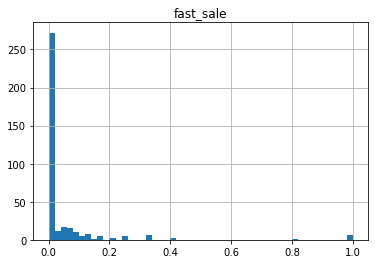

In [92]:
fast_sale_stat.hist(bins = 50)

Пик графика находится на 0.02, значит в большинстве населенных пунктов только 2% продаж квартир аномально быстрые. Также есть населенные пункты, где все квартиры продаются в двух недель.

Рассмотрим долгие продажи, которые длились более 2 лет. 

In [93]:
realty['slow_sale'] = realty['days_exposition'] > 730

In [94]:
print(realty['slow_sale'].mean())
print(realty['slow_sale'].sum())

0.031744688055532044
750


Таких продаж всего 3,2 %.

In [95]:
slow_sale_stat = realty.pivot_table(index = 'locality_name', values = 'slow_sale')

In [96]:
slow_sale_stat.sort_values(by = 'slow_sale', ascending = False).head(10)

,slow_sale
locality_name,
поселок Севастьяново,1.000000
поселок Коробицыно,1.000000
посёлок Лисий Нос,0.500000
деревня Рабитицы,0.500000
поселок Рябово,0.500000
поселок городского типа Красный Бор,0.400000
посёлок Молодёжное,0.400000
деревня Ваганово,0.333333
поселок Любань,0.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DD42D4610>]],
      dtype=object)

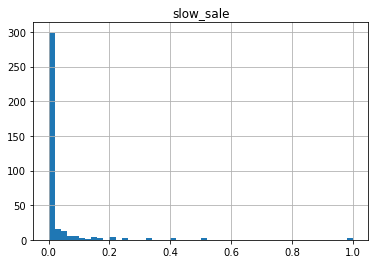

In [97]:
slow_sale_stat.hist(bins = 50)

Как и в случае с быстрыми продажами, приблизительно 2 % квартир в большинстве населенных пунктов были выставлены на продажу более 2 лет.

#### Чистка данных

Для начала сделаем срез по времени продажи квартир. Избавимся от аномально долгих и коротких продаж.

In [98]:
good_realty = realty.query('14 <= days_exposition <= 730')

In [99]:
good_realty['days_exposition'].describe()

count    18086.000000
mean       163.891739
std        156.872041
min         14.000000
25%         48.000000
50%        103.000000
75%        225.000000
max        729.000000
Name: days_exposition, dtype: float64

После того, как из данных исчезли аномальные значения, которые мы определи ранее, среднее время продажи квартиры стало 154 дня.

In [100]:
len(good_realty)

18086

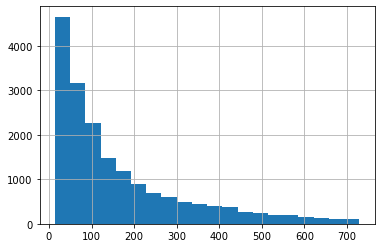

In [101]:
good_realty['days_exposition'].hist(bins = 20)

Вернемся к параметрам, которые рассматривали ранее. Начнем с высоты потолков. Сегодня минимальной нормой в России считается высота потолка 2,4 метра - именно эту высоту установим в качестве нижней границы. В качестве верхней границы установим высоту 4 метра. На гистограмме распределения высоты потолков, квартир выше 4 метров очень мало. 

In [102]:
good_realty = good_realty.query('2.4 <= ceiling_height <= 4')

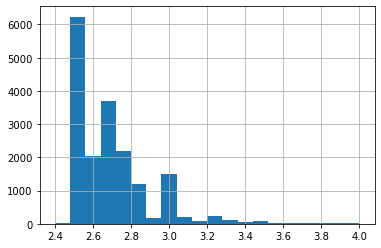

In [103]:
good_realty['ceiling_height'].hist(bins = 20)

Большинство квартир имеют высоту потолков 2.7 и 2.5 м. Видимо это связано с изменением стандартов строительства. Средним значением в квартире нового типа, считается высота от 2,6 до 2,8 м. В то время как в квартирах старой застройки зачастую высота потоков составляет 2.5 м (например в "хрущевках").

In [104]:
len(good_realty)

18020

Рассмотрим стоимость квадратного метра в квартирах:

In [105]:
good_realty['price_per_meter'].describe()

count    1.802000e+04
mean     9.736248e+04
std      4.728515e+04
min      7.962960e+03
25%      7.604095e+04
50%      9.375000e+04
75%      1.117647e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

In [106]:
len(good_realty[good_realty['price_per_meter'] > 300000])

108

In [107]:
good_realty[good_realty['price_per_meter'] > 
            300000].groupby('locality_name')['price_per_meter'].agg({'count','mean'})

,mean,count
locality_name,,
Всеволожск,640422.350000,1
Зеленогорск,323943.660000,1
Санкт-Петербург,454092.158491,106


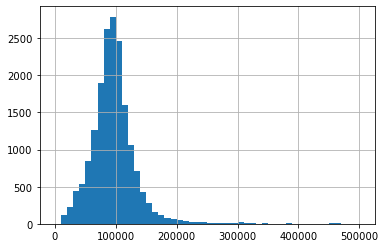

In [108]:
good_realty['price_per_meter'].hist(bins = 50, range = (0, 500000))

(0.0, 500000.0)

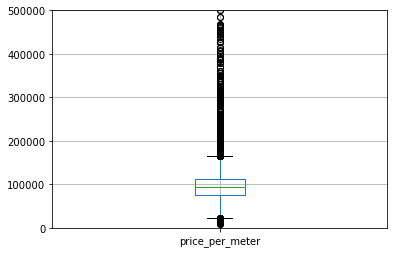

In [109]:
good_realty.boxplot(column = 'price_per_meter')
plt.ylim(0, 500000)

В целом стоимость квадратного метра по всем объявлениям имеет нормальное распределение. Ограничим максимальное значение суммой 300000 руб. Таким образом мы исклюбчим из выборки ещё 108 квартир.

Также в таблице имеются объявления с неправдоподобно низкими ценами. Есть объявления с ценой за квадратный метр ниже 20000 руб. 


In [110]:
good_realty['low_price_realty'] = good_realty['price_per_meter'] < 20000

In [111]:
good_realty['low_price_realty'].mean()

0.006992230854605993

In [112]:
good_realty['low_price_realty'].sum()

126

In [113]:
low_price_pivot = good_realty.pivot_table(index = 'locality_name', values = 'low_price_realty')
#low_price_pivot[low_price_pivot['low_price_realty'] > 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DD41856D0>]],
      dtype=object)

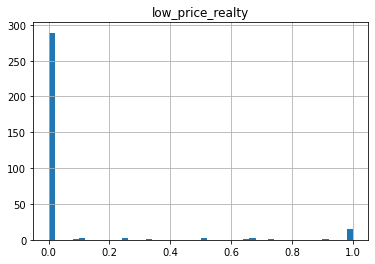

In [114]:
low_price_pivot.hist(bins = 50)

Преимущественно жилье с очень низкими ценами продается в деревнях и поселках. Во многих из них доля квартир с ценой ниже 20000 тысяч достигает 100 %. Возможно это и правда, но в рамках нашего исследования эти данные выглядят как "выброс", поэтому избавимся от них.

In [115]:
good_realty = good_realty.query('20000 <= price_per_meter <= 300000')

Далее рассмотрим аномальные значения в площадах квартир:

In [116]:
good_realty['total_area'].describe()

count    17786.000000
mean        58.049940
std         30.784374
min         12.000000
25%         39.600000
50%         50.800000
75%         67.200000
max        590.000000
Name: total_area, dtype: float64

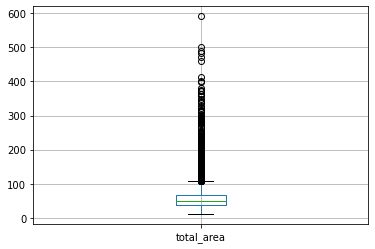

In [117]:
good_realty.boxplot(column = 'total_area')

Уберем из таблицы квартиры с площадью свыше 300 кв.м. Минимальные значения площади попадают в пределы нормальных показателей. 

In [118]:
good_realty = good_realty.query('total_area <= 300')

In [119]:
len(good_realty)

17758

### Какие факторы больше всего влияют на стоимость квартиры?

Для начала рассмотрим как влияют на цену квадратного метра площадь квартиры, высота потолков, количество комнат, а также удаленность от центра.

In [120]:
good_realty[['price_per_meter','total_area','rooms','cityCenters_nearest', 
             'living_area', 'kitchen_area', 'ceiling_height','floor' ]].corr().head(1)

,price_per_meter,total_area,rooms,cityCenters_nearest,living_area,kitchen_area,ceiling_height,floor
price_per_meter,1.0,0.185285,-0.04372,-0.405105,0.09203,0.245082,0.297039,0.198943


Сильнее всего цена связана c удаленностью от центра. Эти два параметра имеют обратную зависимость. Площадь квартиры и количество комнат слабо влияют на цену. Видимо это связано с тем, что квартиры выбирают по совокупности определенных характеристик, поэтому ни у одного из показателей нет большого преимущества. 

Разобьем квартиры на несколько категорий в зависимости от площади и посмотрим на связь между этими параметрами. 

In [121]:
good_realty['total_area'].describe() # Получится 4 категории

count    17758.000000
mean        57.540648
std         27.866496
min         12.000000
25%         39.500000
50%         50.700000
75%         67.100000
max        300.000000
Name: total_area, dtype: float64

In [122]:
def area_category(m):
    if  m < 40:
        return 'Квартиры до 40 кв.м'
    if 40 <= m < 51:
        return 'Квартиры от 40 до 51 кв.м.'
    if 51 <= m < 67:
        return 'Квартиры от 51 до 67 кв.м.'   
    return 'Квартиры свыше 67 кв.м.'

In [123]:
good_realty['area_category'] = good_realty['total_area'].apply(area_category)

In [124]:
good_realty.pivot_table(index = 'area_category', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])
   

,count,mean
,price_per_meter,price_per_meter
area_category,,
Квартиры до 40 кв.м,4495,96989.294525
Квартиры от 40 до 51 кв.м.,4414,90799.813858
Квартиры от 51 до 67 кв.м.,4315,89580.273284
Квартиры свыше 67 кв.м.,4534,105117.437768


Средняя цена за квадратный метр в квартирах меньше 40 кв.м. выше, чем в квартирах среднего размера. Это вполне логично, потому что на жилье меньшего размера обычно спрос больше. Самая высокая цена в квартирах с площадью свыше 67 кв.м.

In [125]:
good_realty.pivot_table(index = 'rooms', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
rooms,,
0,150,109079.095467
1,6318,99282.137142
2,6027,93100.019821
3,4180,92590.069639
4,798,97428.097782
5,201,105894.403483
6,55,107884.138182
7,23,111071.667826


Text(0.5, 1.0, 'Зависимость цены от количетсва комнат')

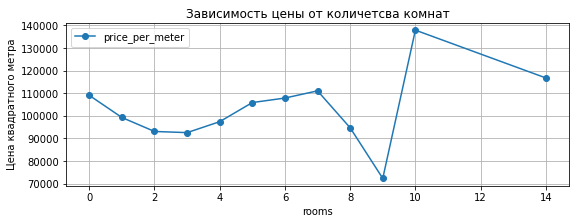

In [126]:
good_realty.pivot_table(index = 'rooms', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean']).plot(style='o-', y = 'mean',                         
                        figsize = (9, 3),
                        grid=True)
plt.ylabel("Цена квадратного метра")
plt.ylabel("Цена квадратного метра")
plt.title('Зависимость цены от количетсва комнат')

Стоимость квадратного метра в квартирах с 0(студии и квартиры с открытой планировкой) и 1 комнатой выше, чем в 2-х и 3-хкомнатных квартирах. В квартирах с 4-мя и более комнатами цена за кв. метр возрастает.

Рассмотрим как высота потолков влияет на цену. Разобьем квартиры на категории в зависимости от высоты потолков. 

In [127]:
good_realty['ceiling_height'].describe()

count    17758.000000
mean         2.696287
std          0.206357
min          2.400000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

Воспользуемся квартилями для распределения кварир по группам

In [128]:
def ceiling_height_category(h):
    if  h < 2.6:
        return 'Высота квартиры до 2.55 м'
    if 2.55 <= h < 2.65:
        return 'Высота квартиры от 2.55 м до 2.65 м'    
    if 2.65 <= h < 2.75:
        return 'Высота квартиры от 2.65 м до 2.75 м'       
    return 'Высота квартиры выше 2.75 м'

In [129]:
good_realty['ceiling_height_category'] = good_realty['ceiling_height'].apply(ceiling_height_category)

In [130]:
good_realty.pivot_table(index = 'ceiling_height_category', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
ceiling_height_category,,
Высота квартиры выше 2.75 м,5808,108430.622271
Высота квартиры до 2.55 м,6429,83553.825670
Высота квартиры от 2.55 м до 2.65 м,1828,92155.541772
Высота квартиры от 2.65 м до 2.75 м,3693,98701.778928


Чем выше потолки в квартире, тем выше цена за квадратный метр. 

Рассмотрим влияет ли на цену квартиры то, на каком этаже она находится:

In [131]:
good_realty.pivot_table(index = 'floor_class', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
floor_class,,
другой,13130,99501.987839
первый,2167,80557.681763
последний,2461,88934.986843


Исходя из полученных данных, квадратный метр в квартире на первом этаже дешевле, чем на любом другом. 

Далее рассмотрим зависимость цены от даты размещения: дня недели, месяца и года.

                         count            mean
               price_per_meter price_per_meter
day_exposition                                
0                         2663    95882.090199
1                         3122    95943.295855
2                         2928    95635.912780
3                         3260    95961.798411
4                         3078    95467.346238
5                         1447    95811.702329
6                         1260    94987.446849
--------------------------------------------------
                           count            mean
                 price_per_meter price_per_meter
month_exposition                                
1                           1118    96198.331816
2                           2031    95207.499522
3                           1641    96226.734406
4                           1300    94321.080192
5                           1049    96374.142536
6                           1489    94262.149879
7                           1375    96

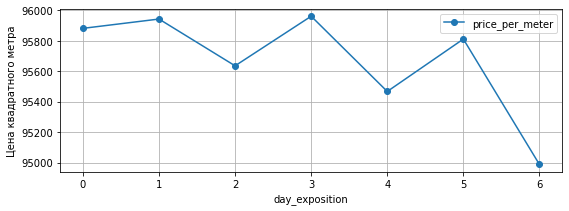

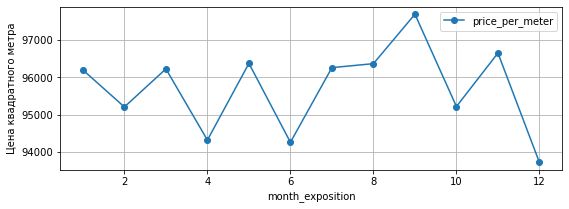

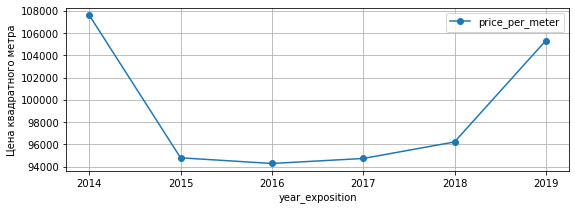

In [132]:
par = ['day_exposition', 'month_exposition', 'year_exposition']
for p in par:
    pivot = good_realty.pivot_table(index = p, 
                                    values = 'price_per_meter', 
                                    aggfunc = ['count','mean'])
    print(pivot)
    pivot['mean'].plot(style='o-', 
                         #xlim =(pivot.index[0], pivot.index[-1]), 
                         #ylim = (94000, 117500),
                         figsize = (9, 3), 
                         grid=True)
    plt.ylabel("Цена квадратного метра")
    print(50*'-')

День размещения объявления о продаже практически не влияет на цену квадратного метра квартиры. Можно обратить внимание только на то, что количество объявлений в выходные дни резко сокращается. 
Месяц размещения также не оказывает большого влияния. Виден небольшой спад цены в апреле, июне и декабре. Самые дорогие объявления публиковались в сентябре.
В разрезе лет колебания цены наблюдаются более явно. Снижение цен на рынке недвижимости, продолжавшееся до 2016 года, сменилось плавным ростом к 2019 году. 

#### Анализ 10 населённых пунктов с наибольшим числом объявлений

In [133]:
locality_stat = good_realty.pivot_table(index = 'locality_name', 
                                        values='price_per_meter', 
                                        aggfunc = ['count', 'mean'])
locality_stat.columns = ['count_adv', 'mean_price_per_meter']
locality_stat_10 = locality_stat.sort_values(by = 'count_adv', ascending = False).head(10)

In [134]:
print('Список населенных пунктов с наибольшим числом объявлений:')
for i in locality_stat_10.index:
    print(i, end='\n')

Список населенных пунктов с наибольшим числом объявлений:
Санкт-Петербург
посёлок Мурино
посёлок Шушары
Всеволожск
Колпино
посёлок Парголово
Пушкин
деревня Кудрово
Гатчина
Выборг


([<matplotlib.axis.YTick at 0x20dd444e2b0>,
 <a list of 12 Text major ticklabel objects>)

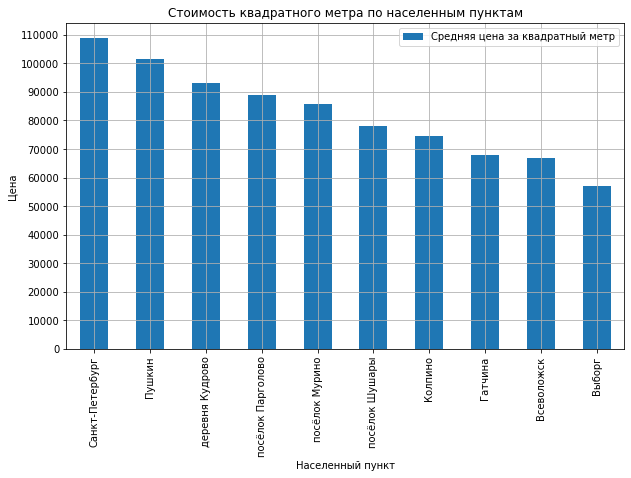

In [135]:
locality_stat_10.sort_values(by = 'mean_price_per_meter', 
                             ascending = False).plot(kind='bar', 
                                                     y='mean_price_per_meter', 
                                                     figsize=(10, 6), grid=True, 
                                                     title = 'Стоимость квадратного метра по населенным пунктам', 
                                                     legend = 'Средняя цена за квадратный метр', 
                                                     label = 'Средняя цена за квадратный метр')
plt.xlabel('Населенный пункт')
plt.ylabel("Цена")
plt.yticks(np.arange(0, 115000, 10000))

In [136]:
locality_stat_10

,count_adv,mean_price_per_meter
locality_name,,
Санкт-Петербург,11752,108819.872948
посёлок Мурино,444,85878.018829
посёлок Шушары,364,77911.245137
Всеволожск,307,66793.730977
Колпино,274,74390.195912
посёлок Парголово,267,89050.991124
Пушкин,264,101586.902955
деревня Кудрово,251,93142.507012
Гатчина,223,67849.974260


Топ-3 населенныйх пунктов Ленинградской области с самой дорогой недвижимостью:
1. г. Санкт-Петербург - 108820 рублей;
2. г. Пушкин - 101587 рублей;
3. деревня Кудрово - 93142.

Населенные пункты с самой низкой стоимостью жилья:
г. Гатчина - 67850 рублей;
г. Всеволжск - 66794 рублей;
г. Выборг - 57206 рублей.


#### Определение центральной зоны для Санкт-Петербурга.

Добавим в таблицу столбец с расстояние до центра города в километрах:

In [137]:
good_realty_spb = good_realty.query('locality_name == "Санкт-Петербург"').reset_index(drop = True)

In [138]:
good_realty_spb['km_to_center'] = (good_realty_spb['cityCenters_nearest'] / 1000).astype('int')

In [139]:
distance_spb_pivot = good_realty_spb.pivot_table(index = 'km_to_center', 
                            values = 'price_per_meter', 
                            aggfunc = ['count', 'mean', 'median']).reset_index()
distance_spb_pivot.columns = ['km_to_center', 'count', 'mean_price', 'median_price']
distance_spb_pivot

,km_to_center,count,mean_price,median_price
0,0,50,137315.491400,126974.560
1,1,156,128060.573077,115921.815
2,2,212,120163.571462,110040.555
3,3,350,115505.603143,106017.975
4,4,636,131041.873381,124291.895
5,5,517,130435.712050,120978.120
6,6,314,130264.486943,122516.025
7,7,308,129064.128571,122858.200
8,8,488,117641.250451,111385.565
9,9,532,107578.616729,103813.950


Text(0.5, 1.0, 'Зависимость цены и удаленности до центра города')

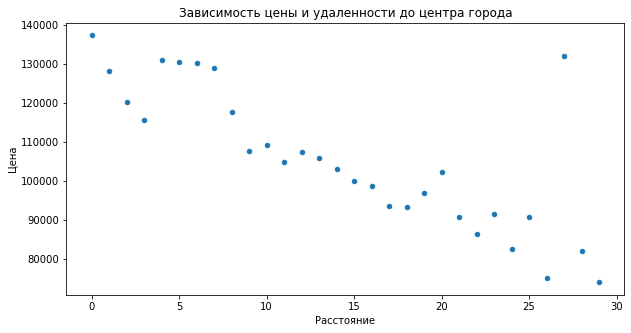

In [140]:
distance_spb_pivot.plot(x = 'km_to_center', y='mean_price', 
                        kind='scatter', 
                        figsize = (10, 5))
plt.ylabel('Цена')
plt.xlabel('Расстояние')
plt.title('Зависимость цены и удаленности до центра города')

##### Данный график показывает, что цена за квадратный метр  снижается по мере удаления от центра города. 

Text(8.7, 300000, 'Центр')

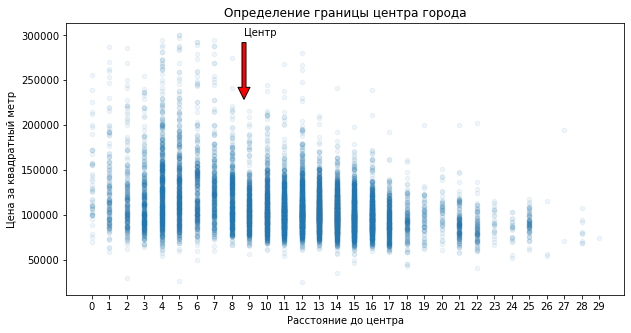

In [141]:
good_realty_spb.plot(x = 'km_to_center', y='price_per_meter',
                     kind='scatter', figsize = (10, 5), alpha=0.07)
plt.xlabel('Расстояние до центра')
plt.ylabel("Цена за квадратный метр")
plt.title('Определение границы центра города')
plt.xticks(np.arange(0, 30, 1))
plt.annotate("Центр", xy=(8.7, 225000), xytext=(8.7, 300000),
            arrowprops=dict(facecolor='red', shrink=0.05))

На графике разброса видно, что точки с 1 по 8 километр образуют кластер с высокими ценами. Будем считать, что границы центра находятся в пределех 8 километров.  


#### Анализ объявлений квартир в центре и сравнение со всей выборкой

In [142]:
spb_center = good_realty_spb.query('km_to_center <= 8').reset_index(drop = True)

In [143]:
spb_center['price_per_meter'].mean()

125894.5851336187

In [144]:
good_realty['price_per_meter'].mean()

95725.79115440889

Средняя цена за квадратный метр в центре города более чем на 30000 рублей выше, чем цена по всей выборке.

        total_area
count  3031.000000
mean     80.271719
std      41.819270
min      12.000000
25%      50.450000
50%      70.900000
75%      96.700000
max     300.000000


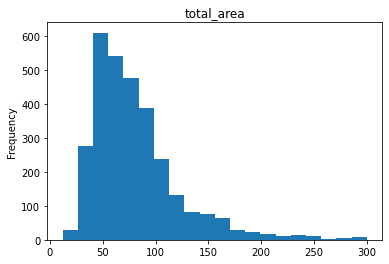

       price_per_meter
count      3031.000000
mean     125894.585134
std       40187.484313
min       26250.000000
25%       97768.890000
50%      117391.300000
75%      143500.835000
max      300000.000000


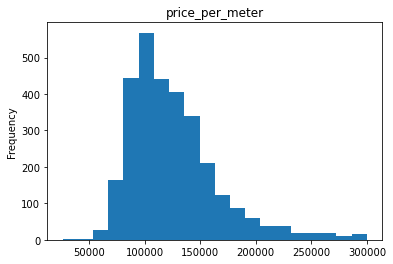

             rooms
count  3031.000000
mean      2.598812
std       1.255766
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      14.000000


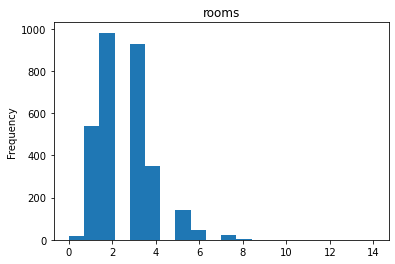

       ceiling_height
count     3031.000000
mean         2.899294
std          0.306031
min          2.400000
25%          2.650000
50%          2.850000
75%          3.000000
max          4.000000


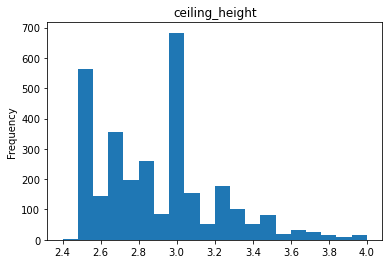

In [145]:
# Параметры квартир в центре Санкт-Петербурга:
for column_name in column_names:
    print(spb_center[[column_name]].describe())

    spb_center[column_name].plot(kind = 'hist', y = column_name, 
                                 bins = 20, title = column_name)
    plt.show()

         total_area
count  17758.000000
mean      57.540648
std       27.866496
min       12.000000
25%       39.500000
50%       50.700000
75%       67.100000
max      300.000000


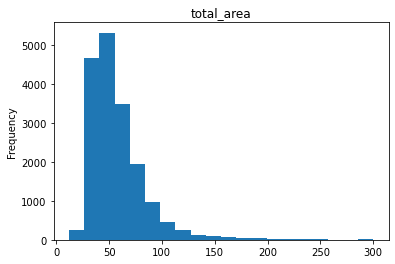

       price_per_meter
count     17758.000000
mean      95725.791154
std       33193.081583
min       20000.000000
25%       76389.555000
50%       93750.000000
75%      111428.570000
max      300000.000000


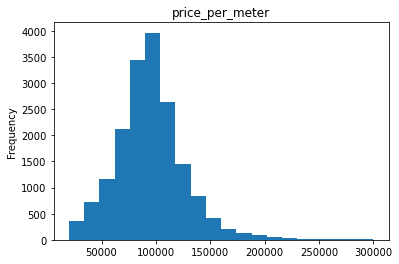

             rooms
count  17758.00000
mean       2.00794
std        1.00452
min        0.00000
25%        1.00000
50%        2.00000
75%        3.00000
max       14.00000


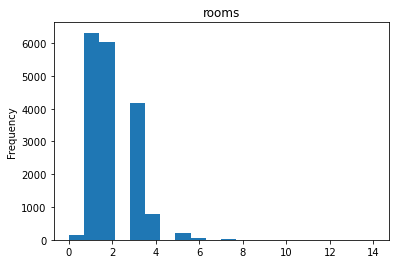

       ceiling_height
count    17758.000000
mean         2.696287
std          0.206357
min          2.400000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000


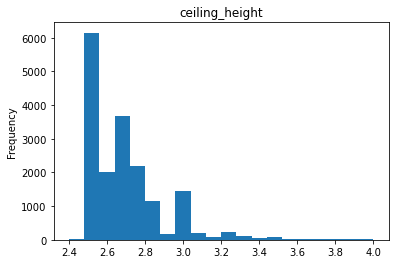

In [146]:
# Параметры квартир по всей выборке:
for column_name in column_names:
    print(good_realty[[column_name]].describe())
    good_realty[column_name].plot(kind = 'hist', y = column_name, 
                                 bins = 20, title = column_name)
    plt.show()

Для сравнения квартир в центре Санкт-Петербурга и квартир по всей выборке буду испльзовать медианные значения.
Согласно полученным данным, квартира в центре Санкт-Петербурга выглядит так: 2-3 комнаты площадью 71 кв.м. с высотой потолков 2.85 м и ценой квадратного метра - 117391 руб. 
Для всей выборки средние показатели были: 1-2 комнаты, площадь 52 кв.м с высотой потолков 2.65 м и ценой за квадратный метр 94861 рубля.

Квартиры в центре города более комфортные, но и куда более дорогие.

In [147]:
spb_center[['price_per_meter','total_area','rooms',
            'cityCenters_nearest', 'living_area', 'kitchen_area']].corr().head(1)

,price_per_meter,total_area,rooms,cityCenters_nearest,living_area,kitchen_area
price_per_meter,1.0,0.051106,-0.168209,-0.020106,-0.057645,0.214325


Ни с одной из характеристик у цены нет сильной связи. 

Разобьем квартиры на несколько категорий в зависимости от площади и посмотрим на связь между этими параметрами. (Для разграничения категорий используем квартили как и ранее)

In [148]:
def area_category2(m):
    if  m < 51:
        return 'Квартиры до 51 кв.м'
    if 51 <= m < 71:
        return 'Квартиры от 51 до 71 кв.м.'
    if 71 <= m < 97:
        return 'Квартиры от 71 до 97 кв.м.'   
    return 'Квартиры свыше 97 кв.м.'

In [149]:
spb_center['area_category'] = spb_center['total_area'].apply(area_category2)

In [150]:
spb_center.pivot_table(index = 'area_category', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])
   

,count,mean
,price_per_meter,price_per_meter
area_category,,
Квартиры до 51 кв.м,763,127534.283604
Квартиры от 51 до 71 кв.м.,754,123719.730570
Квартиры от 71 до 97 кв.м.,759,121918.871726
Квартиры свыше 97 кв.м.,755,130406.263126


Выводы сформулированные ранее справедливы и для центра Санкт-Петербурга. В квартирах средней площади цена квадратного метра ниже чем, в квартирах меньшей площади.

In [151]:
spb_center.pivot_table(index = 'rooms', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
rooms,,
0,17,136619.684118
1,541,138378.744196
2,981,127457.847513
3,928,123009.919989
4,348,116835.722845
5,141,114778.023404
6,47,111542.850851
7,22,114338.290909


Выявлена обратная зависимость между количеством комнат в квартире и ценой за квадратный метр: с увеличением числа комнат цена снижается.  

Рассмотрим теперь как высота потолков влияет на цену квартир в центре города. Так как выборка сузилась, разделим квартиры на 3 категории в зависимости от высоты. Рассмотрим следующие категории: 1) высота до 2.7 м; 2) высота от 2.7 до 3 м; 3) высота потолков свыше 3 м.

In [152]:
def ceiling_height_category1(h):
    if  h < 2.7:
        return 'Высота квартиры до 2.7 м'
    if 2.7 <= h < 3:
        return 'Высота квартиры от 2.7 м до 3 м'    
    
    return 'Высота квартиры выше 3 м'

In [153]:
spb_center['height_category_center'] = spb_center['ceiling_height'].apply(ceiling_height_category1)

In [154]:
spb_center.pivot_table(index = 'height_category_center', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
height_category_center,,
Высота квартиры выше 3 м,1416,126116.875290
Высота квартиры до 2.7 м,797,120357.260439
Высота квартиры от 2.7 м до 3 м,818,130904.957897


Цена квартиры в центре города также зависит от высоты потолков, как и цена квартиры по всей выборке.

In [155]:
spb_center.pivot_table(index = 'floor_class', 
                        values = 'price_per_meter', 
                        aggfunc = ['count', 'mean'])

,count,mean
,price_per_meter,price_per_meter
floor_class,,
другой,2196,129048.110209
первый,335,110164.794716
последний,500,122583.262580


Зависимость цены квадратного метра от этажа, на котором находится квартира, одинакова как для центра Санкт-Петербурга, так и для всех объявлений в целом. Метр площади на первом и последнем этажах обойдется дешевле, чем на других этажах.

                         count            mean
               price_per_meter price_per_meter
day_exposition                                
0                          447   129218.667494
1                          509   125873.664342
2                          500   126152.723640
3                          633   122852.845213
4                          523   124829.151683
5                          244   128954.809385
6                          175   126646.944914
--------------------------------------------------
                           count            mean
                 price_per_meter price_per_meter
month_exposition                                
1                            182   127068.837088
2                            322   125302.522516
3                            285   131388.942526
4                            221   120470.417964
5                            205   127500.196683
6                            257   125345.235409
7                            249   125

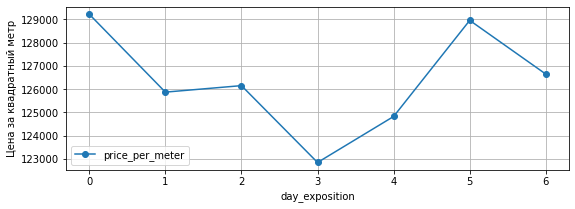

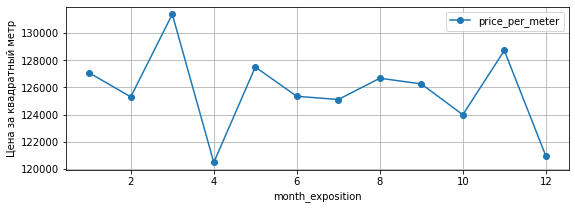

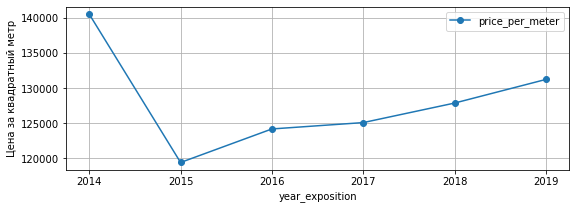

In [156]:
for p in par:
    pivot = spb_center.pivot_table(index = p, 
                                    values = 'price_per_meter', 
                                    aggfunc = ['count','mean'])
    print(pivot)
    pivot['mean'].plot(style='o-', 
                         #xlim =(pivot.index[0]-1, pivot.index[-1]+1), 
                         #ylim = (122000, 145500),
                         figsize = (9, 3), 
                         grid=True)
    plt.ylabel("Цена за квадратный метр")
    print(50*'-')

Можно отметить, что для центра Санкт-Петербурга на графиках прослеживается более четкая динамика. По объявлениям, размещенным в понедельник и субботу зафиксированы самые высокие цены, в то время как в среду наблюдается спад. 
Динамика по месяцам следующая: цены на квартиры выше в объявлениях, опубликованных в марте и ноябре; цена снижается в апреле и декабре.
Отличается от предыдущего графика изменение цены в центре города по годам. Падение цены закончилось уже в 2015 году и с тех пор плавно возвращатся к показателям 2014 года. 

In [157]:
spb_center_pivot = spb_center.pivot_table(index = 'km_to_center', 
                            values = 'price_per_meter', 
                            aggfunc = ['count','mean']).reset_index()
spb_center_pivot.columns = ['km_to_center', 'count', 'mean_price']
spb_center_pivot

,km_to_center,count,mean_price
0,0,50,137315.491400
1,1,156,128060.573077
2,2,212,120163.571462
3,3,350,115505.603143
4,4,636,131041.873381
5,5,517,130435.712050
6,6,314,130264.486943
7,7,308,129064.128571
8,8,488,117641.250451


Text(0, 0.5, 'Расстояние')

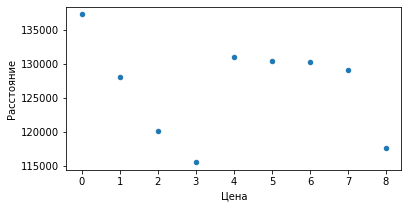

In [158]:
spb_center_pivot.plot(x = 'km_to_center', y='mean_price', 
                        kind='scatter', 
                        figsize = (6, 3))
plt.xlabel('Цена')
plt.ylabel('Расстояние')

Здесь мы получили графическое подтверждение низкого значения коэффициента корреляции между расстоянием от центра и ценой квадратного метра. Значения распределились неоднородно. 

<a id = "step5"></a>
## Шаг 5. Общий вывод

[Начало](#head)  [1](#step1)  [2](#step2)  [3](#step3) [4](#step4)

В ходе работы был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних   населённых пунктов за несколько лет. Была проведена предобработка данных и расчет дополнитедльных параметров. Также проведен исследовательский анализ данных с целью выявления факторов которые влияют на цену квартир.
        
По результатам рассмотрения времени продажи квартир были установлены границы для опледеления быстрых и долгих продаж. Под категорию "быстрой продажи" попали объявления, которые были опубликованы на строк менее 14 дней. Долгими продажами стали все объявления, срок которых превысил 2 года.
Анализ зависимости цены и удалённости от центра позволил определить условную границу центра города - это расстояние в радиусе 8 км.

На цену квартиры влиет не какой-то определенный фактор, а их совокупность. Было установлено, что в квартирах большой и малой площади цена за квадратный метр выше, чем в квартирах средних размеров. Это было характерно как для всех рассматриваемых квартир, так и для квартир в центре Санкт-Петербурга. 

Для всей выборки объявлений стоимость квадратного метра в квартирах с 0(студии и квартиры с открытой планировкой) и 1 комнатой выше, чем в 2-х и 3-хкомнатных квартирах. В квартирах с 4-мя и более комнатами цена за кв. метр возрастает. Для объявлений в центре Санкт-Петербурга наблюдается другой тренд. В увеличеним числа комнат цена за квадратный метр снижается. Этаж расположения квартиры тоже имеет значение - на первом и последнем этажах квартира обойдется дешевле. 

Была проанализирована зависимость цены от даты размещения объявления. Сильнее всего видна динамика изменения цены в разрезе лет. Так, для всего набора данных, можно увидеть снижение цен на рынке недвижимости, которое продолжалось до 2016 года и сменилось плавным ростом к 2019 году. В свою очередь цены на недвижимость в центре Санкт-Петербурга снижались только в 2015 году.

Немаловажным фактором, значительно влияющим на цену квартиры, является удаленность от центра. Но это характерно для всего Санкт-Петербурга. В центре города, что совершенно логично, этот показатель большой роли не играет. 

В список населенных пунктов с наибольшим числом объявлений попали: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
    При этом самые дорогие квартиры оказались в следующмх населенных пунктах: 
    1. г. Санкт-Петербург - 108820 рублей;
    2. г. Пушкин - 101587 рублей;
    3. деревня Кудрово - 93142.

---